In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv("BankNote_Authentication.csv")
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [83]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


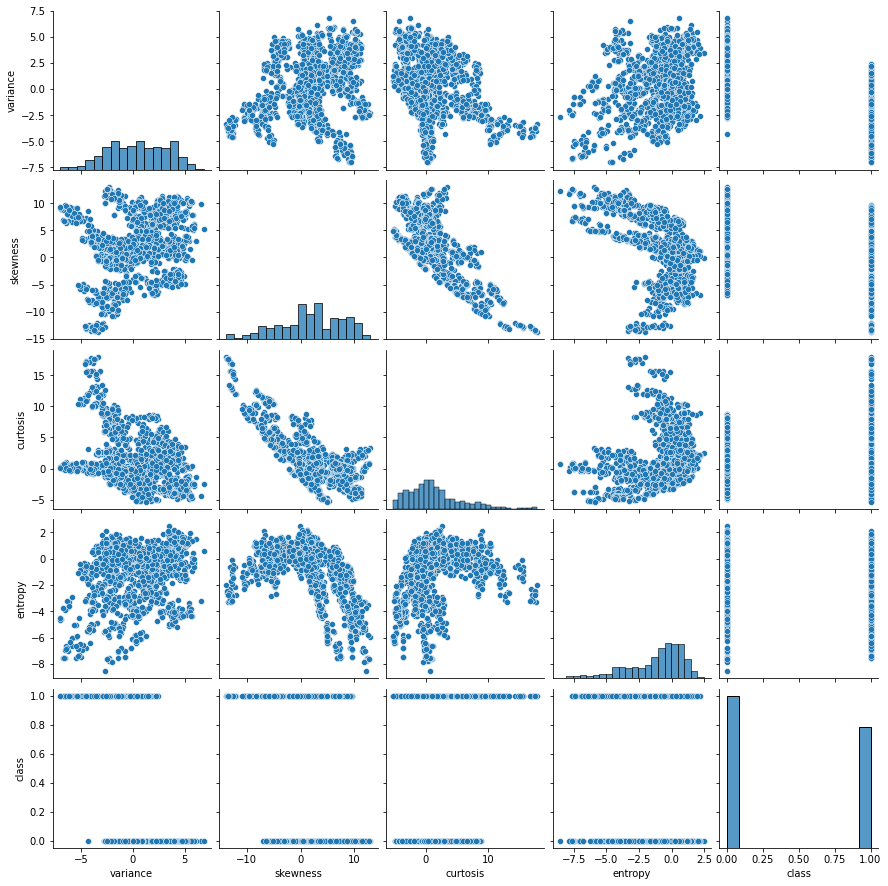

In [84]:
sns.pairplot(data)

<AxesSubplot:>

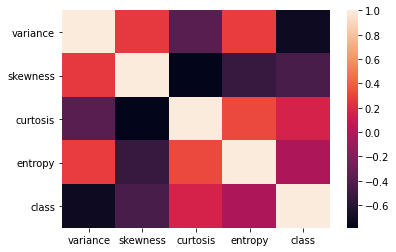

In [85]:
sns.heatmap(data.corr())

In [86]:
X = data.drop("class",axis = 1)
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [87]:
Y = data["class"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [88]:
Y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [96]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu',input_dim = 4))
model.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu'))
model.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))
model.compile(optimizer = 'Adamax',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_83 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train,Y_train,validation_split = 0.33, epochs = 20)

Epoch 1/20
21/21 [==============================] - 0s 16ms/step - loss: 0.9163 - accuracy: 0.7030 - val_loss: 0.7935 - val_accuracy: 0.7697
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 0.8588 - accuracy: 0.7247 - val_loss: 0.7614 - val_accuracy: 0.7760
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.7418 - val_loss: 0.7337 - val_accuracy: 0.7792
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.7856 - accuracy: 0.7543 - val_loss: 0.7095 - val_accuracy: 0.7918
Epoch 5/20
21/21 [==============================] - 0s 4ms/step - loss: 0.7531 - accuracy: 0.7605 - val_loss: 0.6839 - val_accuracy: 0.7950
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 0.7228 - accuracy: 0.7714 - val_loss: 0.6592 - val_accuracy: 0.7981
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.7729 - val_loss: 0.6369 - val_accuracy: 0.7950
Epoch 8/20
21/21 [=

In [98]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

[[169  16]
 [ 63 164]]
              precision    recall  f1-score   support

       False       0.73      0.91      0.81       185
        True       0.91      0.72      0.81       227

    accuracy                           0.81       412
   macro avg       0.82      0.82      0.81       412
weighted avg       0.83      0.81      0.81       412

